After encoding categorical variables:
Shape of features (X): (41188, 20)
Shape of target (y): (41188,)
Scaled features (first 5 rows):
Training set shape: (32950, 20) (32950,)
Test set shape: (8238, 20) (8238,)
Finding optimal K using 5-fold cross-validation:
K = 1, Cross-validation Accuracy = 0.8835
K = 2, Cross-validation Accuracy = 0.8953
K = 3, Cross-validation Accuracy = 0.8952
K = 4, Cross-validation Accuracy = 0.8992
K = 5, Cross-validation Accuracy = 0.8998
K = 6, Cross-validation Accuracy = 0.9021
K = 7, Cross-validation Accuracy = 0.9019
K = 8, Cross-validation Accuracy = 0.9034
K = 9, Cross-validation Accuracy = 0.9033
K = 10, Cross-validation Accuracy = 0.9040
K = 11, Cross-validation Accuracy = 0.9043
K = 12, Cross-validation Accuracy = 0.9032
K = 13, Cross-validation Accuracy = 0.9040
K = 14, Cross-validation Accuracy = 0.9039
K = 15, Cross-validation Accuracy = 0.9044
K = 16, Cross-validation Accuracy = 0.9035
K = 17, Cross-validation Accuracy = 0.9051
K = 18, Cross-vali

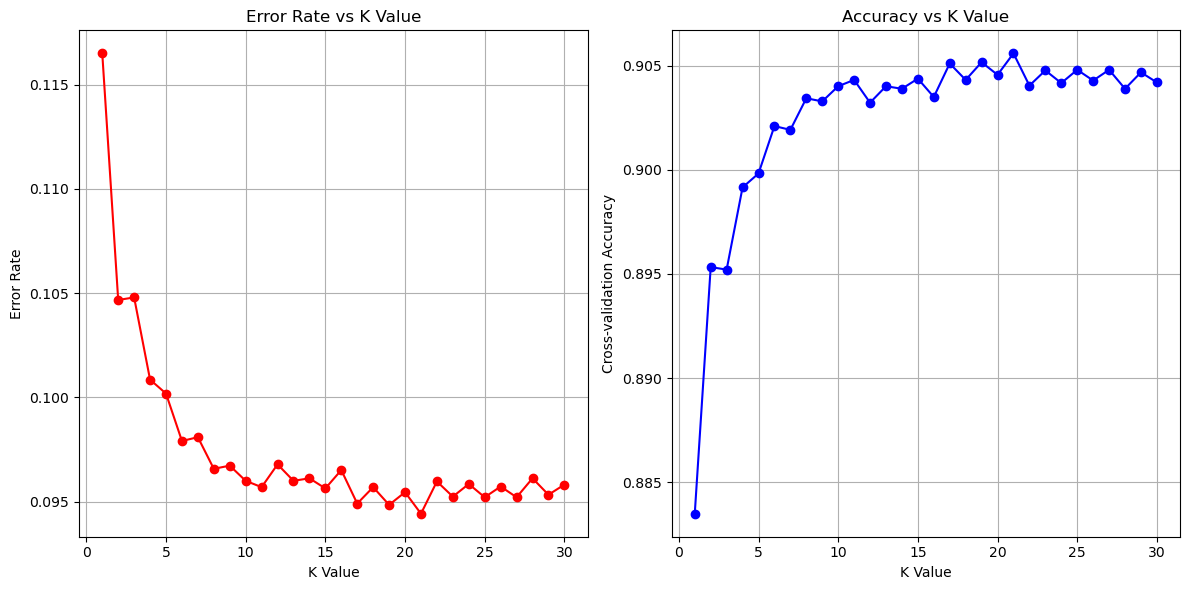

Optimal K value based on minimum error rate: 21
K = 1, Accuracy = 0.8816
K = 2, Accuracy = 0.8940
K = 3, Accuracy = 0.8938
K = 4, Accuracy = 0.8997
K = 5, Accuracy = 0.8997
K = 6, Accuracy = 0.9009
K = 7, Accuracy = 0.9007
K = 8, Accuracy = 0.9003
K = 9, Accuracy = 0.9022
K = 10, Accuracy = 0.9022
K = 11, Accuracy = 0.9035
K = 12, Accuracy = 0.9036
K = 13, Accuracy = 0.9043
K = 14, Accuracy = 0.9031
K = 15, Accuracy = 0.9040
K = 16, Accuracy = 0.9031
K = 17, Accuracy = 0.9034
K = 18, Accuracy = 0.9037
K = 19, Accuracy = 0.9043
K = 20, Accuracy = 0.9026
K = 21, Accuracy = 0.9031
K = 22, Accuracy = 0.9019
K = 23, Accuracy = 0.9024
K = 24, Accuracy = 0.9022
K = 25, Accuracy = 0.9018
K = 26, Accuracy = 0.9013
K = 27, Accuracy = 0.9017
K = 28, Accuracy = 0.9023
K = 29, Accuracy = 0.9025
K = 30, Accuracy = 0.9022

Optimal K value: 13 with accuracy: 0.9043


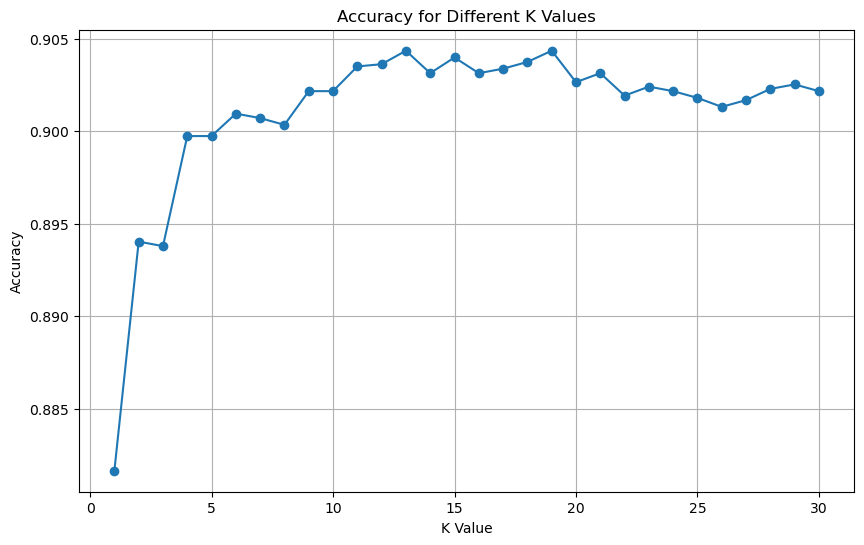

Final KNN model trained with K = 13
Predictions for the first 10 test samples:
Predicted: [0 0 0 0 0 0 0 0 0 0]
Actual: [0 0 0 0 0 0 0 0 0 0]
Accuracy: 0.9043

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7303
           1       0.64      0.36      0.46       935

    accuracy                           0.90      8238
   macro avg       0.78      0.67      0.71      8238
weighted avg       0.89      0.90      0.89      8238



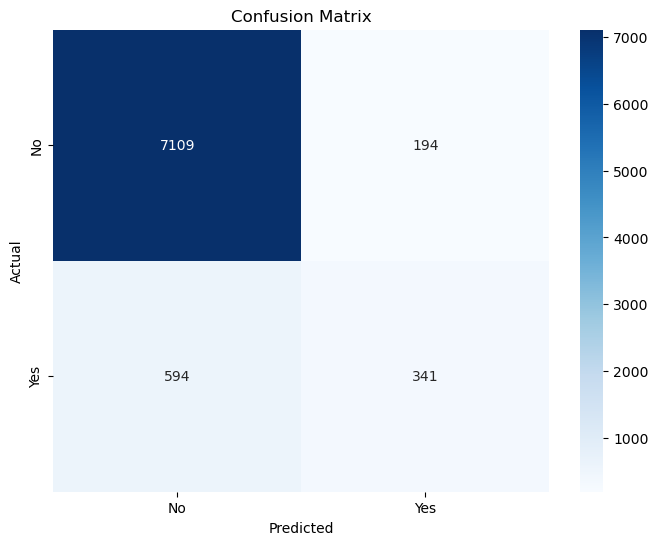


Feature correlation with target variable:
y                 1.000000
duration          0.405274
previous          0.230181
poutcome          0.129789
education         0.057799
cons.conf.idx     0.054878
marital           0.046203
age               0.030399
job               0.025122
day_of_week       0.015967
housing           0.011552
loan             -0.004909
month            -0.006065
campaign         -0.066357
default          -0.099352
cons.price.idx   -0.136211
contact          -0.144773
emp.var.rate     -0.298334
euribor3m        -0.307771
pdays            -0.324914
nr.employed      -0.354678
Name: y, dtype: float64


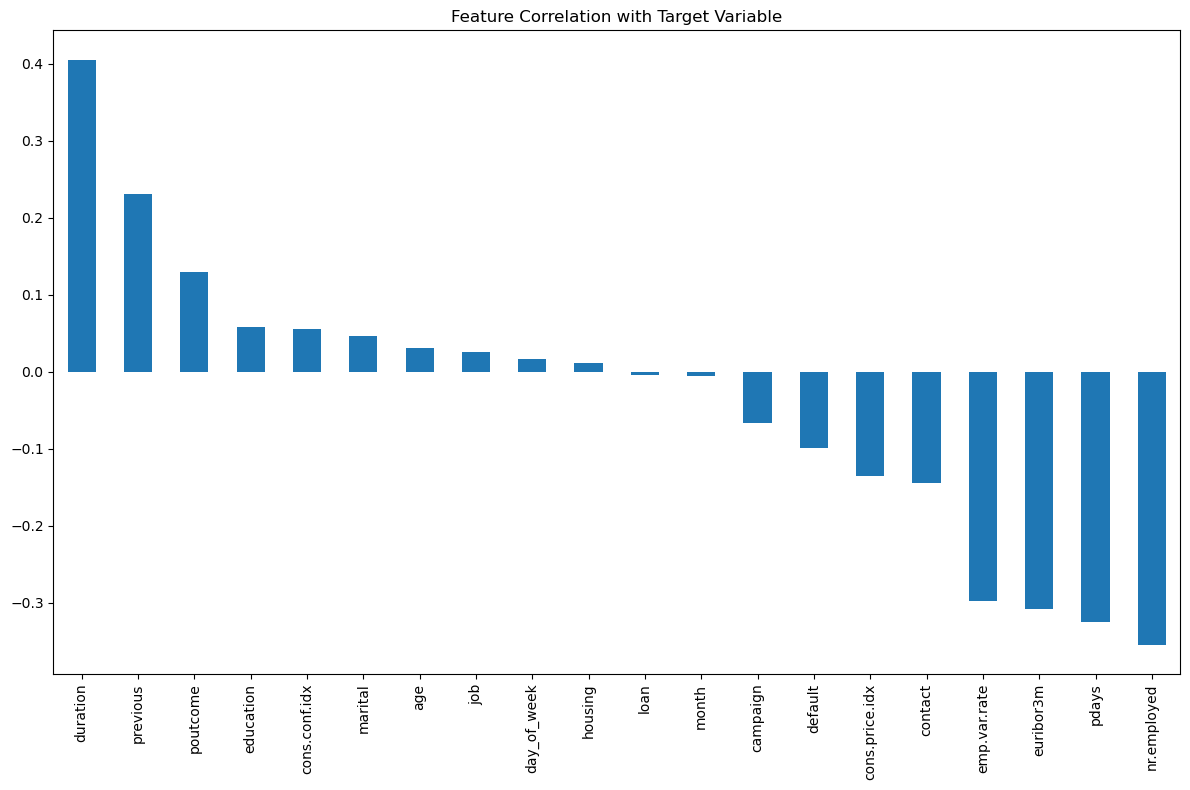

In [2]:
# KNN Direct Marketing Campaigns Analysis

# Step 1: Import necessary libraries and Load the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Load the dataset
df = pd.read_csv('bank_marketing.csv', sep=';')

# Display the first few rows to understand the data structure
df.head()

# Display the last few rows
df.tail()

# Step 2: Preprocessing
# Convert categorical variables into numerical using Label Encoding
# First, let's identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Initialize the label encoder
le = LabelEncoder()

# Apply label encoding to each categorical column
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Check the transformed data
print("After encoding categorical variables:")
df.head()

# Step 3: Define features (X) and target (y)
# The target variable is 'y' which indicates if the client subscribed to a term deposit
X = df.drop('y', axis=1)  # Features
y = df['y']  # Target

print("Shape of features (X):", X.shape)
print("Shape of target (y):", y.shape)

# Step 4: Scale the features (important for KNN)
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X)

# Convert to DataFrame to maintain column names
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print("Scaled features (first 5 rows):")
X_scaled_df.head()

# Step 5: Split into training and test sets (80&20)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

# Step 6: Find the optimal K using 5-fold cross-validation
k_values = list(range(1, 31))
cv_scores = []

print("Finding optimal K using 5-fold cross-validation:")
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())
    print(f"K = {k}, Cross-validation Accuracy = {scores.mean():.4f}")

# Finding the optimal K value from cross-validation
optimal_k_cv = k_values[np.argmax(cv_scores)]
print(f"\nOptimal K value from cross-validation: {optimal_k_cv} with accuracy: {max(cv_scores):.4f}")

# Step 7: Plot the error rate for different K values
# Calculate error rate as 1 - accuracy
error_rates = [1 - score for score in cv_scores]

plt.figure(figsize=(12, 6))

# Plot 1: Error Rate vs K Value
plt.subplot(1, 2, 1)
plt.plot(k_values, error_rates, marker='o', linestyle='-', color='red')
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.title('Error Rate vs K Value')
plt.grid(True)

# Plot 2: Accuracy vs K Value
plt.subplot(1, 2, 2)
plt.plot(k_values, cv_scores, marker='o', linestyle='-', color='blue')
plt.xlabel('K Value')
plt.ylabel('Cross-validation Accuracy')
plt.title('Accuracy vs K Value')
plt.grid(True)

plt.tight_layout()
plt.show()

# Display optimal K based on minimum error rate
optimal_k_error = k_values[np.argmin(error_rates)]
print(f"Optimal K value based on minimum error rate: {optimal_k_error}")

# Step 8: Find and print the optimal K (K with the minimum error rate)
# Testing different K values to find the optimal one on test set
k_values = list(range(1, 31))
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    print(f"K = {k}, Accuracy = {accuracy:.4f}")

# Finding the optimal K value
optimal_k = k_values[np.argmax(accuracy_scores)]
print(f"\nOptimal K value: {optimal_k} with accuracy: {max(accuracy_scores):.4f}")

# Plotting the accuracy for different K values
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='-')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.title('Accuracy for Different K Values')
plt.grid(True)
plt.show()

# Step 9: Train the final KNN model with the optimal K
final_knn = KNeighborsClassifier(n_neighbors=optimal_k)
final_knn.fit(X_train, y_train)

print(f"Final KNN model trained with K = {optimal_k}")

# Step 10: Make predictions
y_pred = final_knn.predict(X_test)

print("Predictions for the first 10 test samples:")
print("Predicted:", y_pred[:10])
print("Actual:", y_test.iloc[:10].values)

# Step 11: Model evaluation
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No', 'Yes'], 
            yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Additional analysis: Feature importance
correlation = df.corr()['y'].sort_values(ascending=False)
print("\nFeature correlation with target variable:")
print(correlation)

plt.figure(figsize=(12, 8))
correlation.drop('y').plot(kind='bar')
plt.title('Feature Correlation with Target Variable')
plt.tight_layout()
plt.show()